In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [124]:
df_merged_final = pd.read_csv('clear_null_df.csv')
df_merged_final.head()

,Unnamed: 0,SK_ID_CURR,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,POS_BAL_SK_DPD_DEF_MAX,INS_BAL_ON_TIME_SUM_FIRST,INS_BAL_INSTALMENT_SUM_FIRST,INS_BAL_DPD_SUM,INS_BAL_DPD_MEAN,INS_BAL_TIME_SPAN_SUM,INS_BAL_ON_TIME_PERCENT_,INS_BAL_PAYMENT_RATIO_,INS_BAL_INS_ON_TIME_GRADE_,INS_BAL_PAYMENT_GRADE_
0,0,100002,24700.5,202500.0,406597.5,Cash loans,House / apartment,0,0,0,...,0.0,19,219625.695,0.0,0.000000,10260.0,1.000000,1.000000,Good,Good
1,1,100003,35698.5,270000.0,1293502.5,Cash loans,House / apartment,0,0,0,...,0.0,25,1618864.650,0.0,0.000000,6120.0,1.000000,1.000000,Good,Good
2,2,100004,6750.0,67500.0,135000.0,Revolving loans,House / apartment,0,0,0,...,0.0,3,21288.465,0.0,0.000000,180.0,1.000000,1.000000,Good,Good
3,3,100006,29686.5,135000.0,312682.5,Cash loans,House / apartment,0,0,0,...,0.0,16,1007153.415,0.0,0.000000,3300.0,1.000000,1.000000,Good,Good
4,4,100007,21865.5,121500.0,513000.0,Cash loans,House / apartment,0,0,1,...,0.0,50,835985.340,63.0,0.954545,23730.0,0.757576,0.964285,Sub_Par,Good


In [9]:
## check null
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(df_merged_final)
null_df

,Feature,Percentage


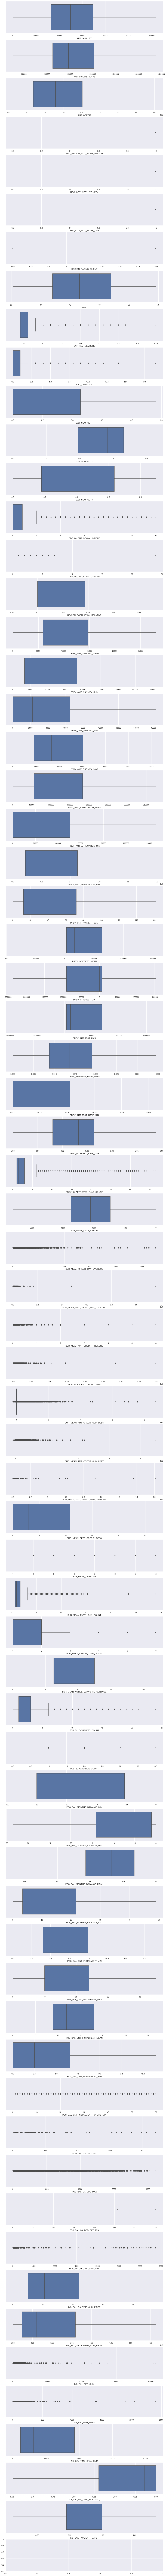

In [127]:
numeric_df = df_merged_final._get_numeric_data()

fig, ax = plt.subplots(67,1,figsize=(16, 4 * 67))
for i,j in enumerate(numeric_df.columns[2:]):
    sns.boxplot(df_merged_final[j], ax= ax[i])

In [61]:
def lower_bound(name_column):
    IQR = df_merged_final[name_column].quantile(0.75) - df_merged_final[name_column].quantile(0.25)
    lower_bridge= df_merged_final[name_column].quantile(0.25)-(IQR*1.5)
    return lower_bridge

In [31]:
def upper_bound(name_column):
    IQR = df_merged_final[name_column].quantile(0.75) - df_merged_final[name_column].quantile(0.25)
    upper_bridge= df_merged_final[name_column].quantile(0.75)+(IQR*1.5)
    return upper_bridge

In [63]:
def replace_max(name_column):
    q3 = upper_bound(name_column)
    df_merged_final.loc[df_merged_final[name_column]>=q3, name_column] = q3

In [62]:
def replace_min(name_column):
    q1 = lower_bound(name_column)
    df_merged_final.loc[df_merged_final[name_column]<=q1, name_column] = q1

In [125]:
for i in ['AMT_ANNUITY','BUR_MEAN_DEBT_CREDIT_RATIO','BUR_MEAN_ACTIVE_LOANS_PERCENTAGE',
         'POS_BAL_MONTHS_BALANCE_STD','POS_BAL_CNT_INSTALMENT_MIN','POS_BAL_CNT_INSTALMENT_MAX',
         'POS_BAL_CNT_INSTALMENT_MEAN','POS_BAL_CNT_INSTALMENT_STD','INS_BAL_ON_TIME_SUM_FIRST',
         'INS_BAL_INSTALMENT_SUM_FIRST','INS_BAL_TIME_SPAN_SUM','INS_BAL_PAYMENT_RATIO_',
         'PREV_INTEREST_RATE_MAX','PREV_INTEREST_RATE_MIN','PREV_INTEREST_RATE_MEAN',
         'PREV_INTEREST_MAX','PREV_INTEREST_MIN','PREV_INTEREST_MEAN',
         'PREV_CNT_PAYMENT_SUM','PREV_AMT_APPLICATION_MAX','PREV_AMT_APPLICATION_MIN',
         'PREV_AMT_APPLICATION_MEAN','PREV_AMT_ANNUITY_MAX','PREV_AMT_ANNUITY_MIN',
         'PREV_AMT_ANNUITY_SUM','PREV_AMT_ANNUITY_MEAN','REGION_POPULATION_RELATIVE',
         "AMT_CREDIT",'AMT_INCOME_TOTAL']:
    replace_max(i)

In [119]:
# replace_max('AMT_ANNUITY')
# replace_max('BUR_MEAN_DEBT_CREDIT_RATIO')
# replace_max('BUR_MEAN_ACTIVE_LOANS_PERCENTAGE')
# replace_max('POS_BAL_MONTHS_BALANCE_STD')
# replace_max('POS_BAL_CNT_INSTALMENT_MIN')
# replace_max('POS_BAL_CNT_INSTALMENT_MAX')
# replace_max('POS_BAL_CNT_INSTALMENT_MEAN')
# replace_max('POS_BAL_CNT_INSTALMENT_STD')
# replace_max('INS_BAL_ON_TIME_SUM_FIRST')
# replace_max('INS_BAL_INSTALMENT_SUM_FIRST')
# replace_max('INS_BAL_TIME_SPAN_SUM')
# replace_max('INS_BAL_PAYMENT_RATIO_')
# replace_max('PREV_INTEREST_RATE_MAX')
# replace_max('PREV_INTEREST_RATE_MIN')
# replace_max('PREV_INTEREST_RATE_MEAN')
# replace_max('PREV_INTEREST_MAX')
# replace_max('PREV_INTEREST_MIN')
# replace_max('PREV_INTEREST_MEAN')
# replace_max('PREV_CNT_PAYMENT_SUM')
# replace_max('PREV_AMT_APPLICATION_MAX')
# replace_max('PREV_AMT_APPLICATION_MIN')
# replace_max('PREV_AMT_APPLICATION_MEAN')
# replace_max('PREV_AMT_ANNUITY_MAX')
# replace_max('PREV_AMT_ANNUITY_MIN')
# replace_max('PREV_AMT_ANNUITY_SUM')
# replace_max('PREV_AMT_ANNUITY_MEAN')
# replace_max('REGION_POPULATION_RELATIVE')
# replace_max("AMT_CREDIT")
# replace_max('AMT_INCOME_TOTAL')

In [126]:
for i in ['BUR_MEAN_DAYS_CREDIT','POS_BAL_MONTHS_BALANCE_MAX','POS_BAL_MONTHS_BALANCE_MEAN',
         'INS_BAL_ON_TIME_PERCENT_','INS_BAL_PAYMENT_RATIO_','PREV_INTEREST_MAX',
         'PREV_INTEREST_MIN','PREV_INTEREST_MEAN','PREV_CNT_PAYMENT_SUM']:
    replace_min(i)

In [120]:
# replace_min('BUR_MEAN_DAYS_CREDIT')
# replace_min('POS_BAL_MONTHS_BALANCE_MAX')
# replace_min('POS_BAL_MONTHS_BALANCE_MEAN')
# replace_min('INS_BAL_ON_TIME_PERCENT_')
# replace_min('INS_BAL_PAYMENT_RATIO_')
# replace_min('PREV_INTEREST_MAX')
# replace_min('PREV_INTEREST_MIN')
# replace_min('PREV_INTEREST_MEAN')
# replace_min('PREV_CNT_PAYMENT_SUM')